In [1]:
import pandas as pd
ds = pd.read_csv('advertising.csv')

In [2]:
#1 descriptive
ds.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Coefficient a: 0.04868787931904815
Intercept b: 4.243028216036329


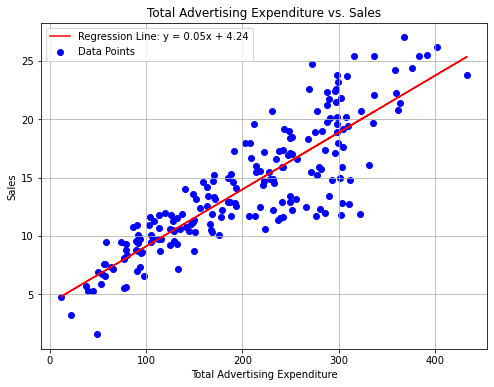

In [10]:
# 2 & 3 find a and b,plot sales vs total, regression line
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("advertising.csv")
#y = a x + b
data['total'] = data['TV'] + data['radio'] + data['newspaper'] 
X = data[['total']]  # x
y = data['sales']  # y  

model = LinearRegression()
model.fit(X, y)
a = model.coef_[0]  
b = model.intercept_ 
print("Coefficient a:", a)
print("Intercept b:", b)

plt.figure(figsize=(8, 6))
plt.scatter(data['total'], data['sales'], color='blue', label='Data Points')

plt.plot(X, model.predict(X), color='red', label=f'Regression Line: y = {a:.2f}x + {b:.2f}')

plt.title('Total Advertising Expenditure vs. Sales')
plt.xlabel('Total Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


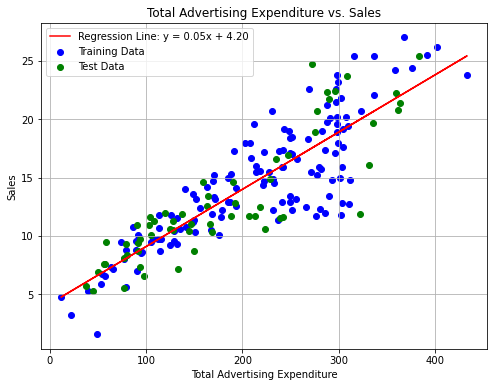

In [24]:
# 4 split data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.read_csv("advertising.csv")
data['total'] = data['TV'] + data['radio'] + data['newspaper']

X = data[['total']]  
y = data['sales']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

a = model.coef_[0] 
b = model.intercept_ 

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

plt.plot(X, model.predict(X), color='red', label=f'Regression Line: y = {a:.2f}x + {b:.2f}')

plt.title('Total Advertising Expenditure vs. Sales')
plt.xlabel('Total Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


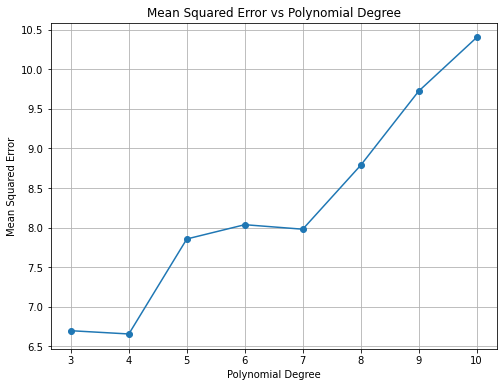

The polynomial degree with minimum error is 4 with MSE = 6.66


In [25]:
# 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("advertising.csv")
data['total'] = data['TV'] + data['radio'] + data['newspaper']
X = data[['total']]
y = data['sales']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = range(3, 11)
mse_values = []

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_pred = model.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE vs Polynomial Degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.grid(True)
plt.show()

#  polynomial degree with minimum error
min_mse_index = np.argmin(mse_values)
optimal_degree = degrees[min_mse_index]
min_mse = mse_values[min_mse_index]
print(f"The polynomial degree with minimum error is {optimal_degree} with MSE = {min_mse:.2f}")


In [15]:
#6 coefficients
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data = pd.read_csv("advertising.csv")
data['total'] = data['TV'] + data['radio'] + data['newspaper']
X = data[['total']]  
y = data['sales']  

degree = 4
polynomial_features = PolynomialFeatures(degree=degree)
X_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Coefficients:")
for i in range(degree + 1):
    print(f"X^{i} coefficient:", coefficients[i])

print("Intercept:", intercept)


Polynomial Coefficients:
X^0 coefficient: 0.0
X^1 coefficient: 0.11866422798380362
X^2 coefficient: -0.0005235403616499309
X^3 coefficient: 1.460348138140201e-06
X^4 coefficient: -1.325390284118939e-09
Intercept: 1.5137906297752863


In [14]:
# 7 MAE , RMSE , R2 score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv("advertising.csv")

data['total'] = data['TV'] + data['radio'] + data['newspaper']

X = data[['total']]  
y = data['sales']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
optimal_degree = 4

polynomial_features = PolynomialFeatures(degree=optimal_degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.94
Root Mean Squared Error (RMSE): 2.58
R-squared (R2) Score: 0.76


In [28]:
# 8 predict sales for given exp values
import numpy as np
advertising_values = np.array([[149, 22, 15]])
total_expenditure = np.sum(advertising_values, axis=1)
total_expenditure_poly = polynomial_features.transform(total_expenditure.reshape(-1, 1))
predicted_sales = model.predict(total_expenditure_poly)
print("Predicted sales:", predicted_sales[0])


Predicted sales: 14.226521919168913
